## Predictive Maintenance for Mining Trucks and Drilling Machines

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [37]:
df =pd.read_excel("Haul_Machines.xlsx")

In [38]:
print(df.head(5))
print(df.shape)

  Machine_ID  Hours_Operated  Breakdowns Last_Service_Date
0    Drill_1             922           3        2024-01-25
1    Truck_1            1871           2        2024-05-11
2    Drill_2            1346           1        2024-12-19
3    Truck_2            1954           2        2024-07-15
4    Drill_3             111           1        2024-10-08
(50, 4)


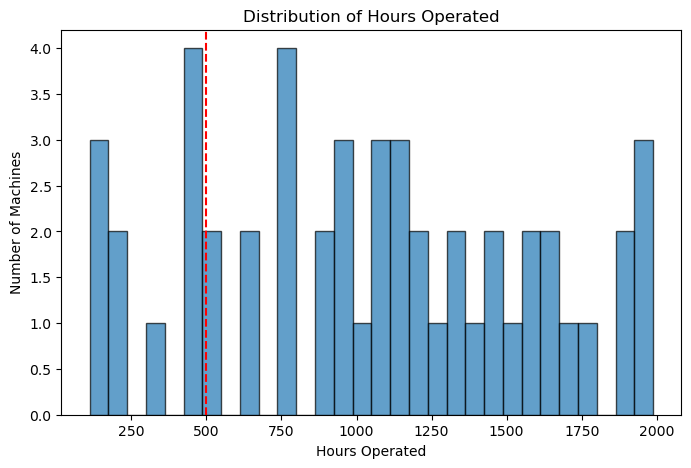

In [39]:
#Distribution of hours operated
plt.figure(figsize=(8,5))
plt.hist(df["Hours_Operated"],bins=30,alpha=0.7,edgecolor="black")
plt.axvline(x=500,color="red",linestyle = "--",label = "500 Hours Threshold")
plt.xlabel("Hours Operated")
plt.ylabel("Number of Machines")
plt.title("Distribution of Hours Operated")
plt.legend
plt.show()

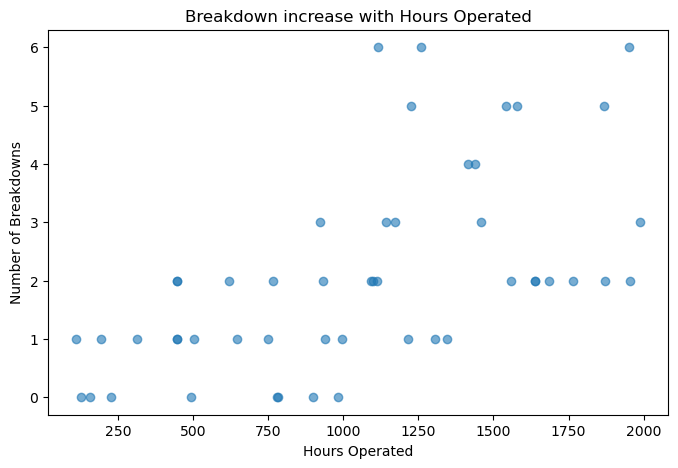

In [40]:
#Hours operated vs Breakdowns
plt.figure(figsize=(8,5))
plt.scatter(df["Hours_Operated"],df["Breakdowns"],alpha=0.6)
plt.xlabel("Hours Operated")
plt.ylabel("Number of Breakdowns")
plt.title("Breakdown increase with Hours Operated")
plt.show()

In [41]:
# Next failure hours= inverse function of hours operated and breakdowns
df["Next_Failure_Hours"] = (2000 - df["Hours_Operated"]) - (df["Breakdowns"] * 50) + np.random.normal(0,100,size = len(df))

In [42]:
print(df.head(5))

  Machine_ID  Hours_Operated  Breakdowns Last_Service_Date  Next_Failure_Hours
0    Drill_1             922           3        2024-01-25          894.021386
1    Truck_1            1871           2        2024-05-11          189.557967
2    Drill_2            1346           1        2024-12-19          417.929786
3    Truck_2            1954           2        2024-07-15          -10.020447
4    Drill_3             111           1        2024-10-08         1692.648982


In [43]:
x = df[["Hours_Operated","Breakdowns"]]
y = df["Next_Failure_Hours"]

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)

In [45]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pred = model.predict(x_test)

In [47]:
print("\nModel Performance:")
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))


Model Performance:
Mean Absolute Error: 100.56853485157724
R2 Score: 0.9571762055605236


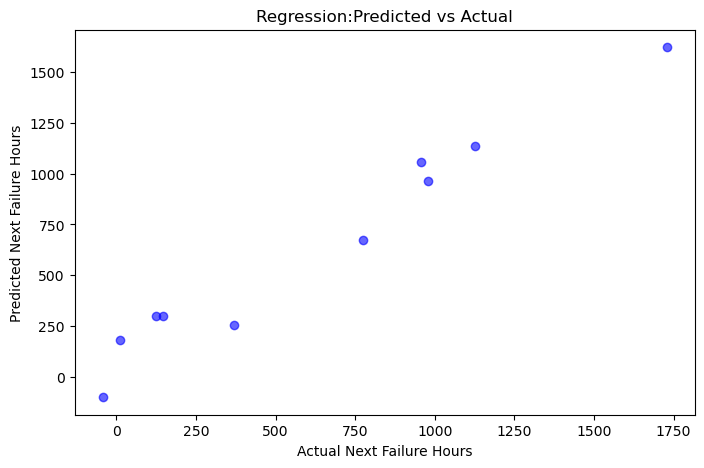

In [48]:
#Predicted vs Actual
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,alpha= 0.6,color= "blue")
plt.xlabel("Actual Next Failure Hours")
plt.ylabel("Predicted Next Failure Hours")
plt.title("Regression:Predicted vs Actual")
plt.show()

C:\Users\PAPA DICKSON\AppData\Local\Temp\ipykernel_12536\295936217.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_rate = df.groupby("Hours_Bin")["Next_Failure_Hours"].mean()


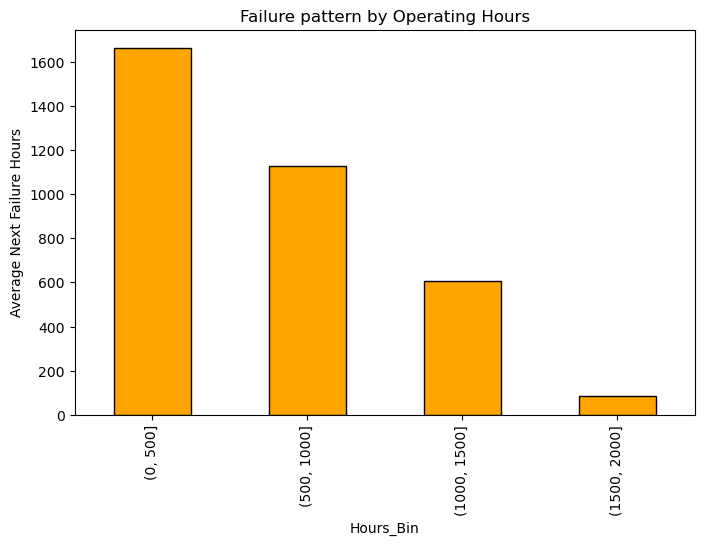

In [49]:
#Average failure by hours
df["Hours_Bin"] = pd.cut(df["Hours_Operated"],bins=[0,500,1000,1500,2000])

failure_rate = df.groupby("Hours_Bin")["Next_Failure_Hours"].mean()

failure_rate.plot(kind= "bar",figsize=(8,5),color = "orange",edgecolor="black")
plt.ylabel("Average Next Failure Hours")
plt.title("Failure pattern by Operating Hours")
plt.show()

## FEATURE ENGINEERING

In [50]:
df["Last_Service_Date"] = pd.to_datetime(df["Last_Service_Date"])
latest_date = df["Last_Service_Date"].max()

In [51]:
# Days since service
df["Days_Since_Service"] = (latest_date - df["Last_Service_Date"]).dt.days

In [56]:
print("\nData with engineered feature:")
print(df[["Machine_ID","Hours_Operated","Breakdowns","Days_Since_Service"]].head())


Data with engineered feature:
  Machine_ID  Hours_Operated  Breakdowns  Days_Since_Service
0    Drill_1             922           3                 340
1    Truck_1            1871           2                 233
2    Drill_2            1346           1                  11
3    Truck_2            1954           2                 168
4    Drill_3             111           1                  83


## Machine wise Time Series Analysis

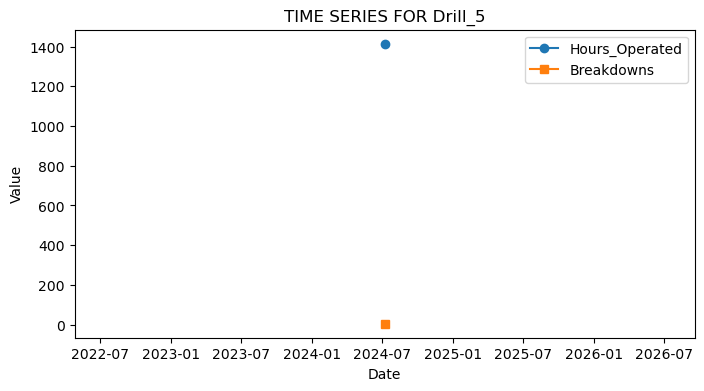

In [59]:
machine_example = "Drill_5"
df_machine = df[df["Machine_ID"] == machine_example].sort_values("Last_Service_Date")
plt.figure(figsize=(8,4))
plt.plot(df_machine["Last_Service_Date"],df_machine["Hours_Operated"], marker= "o",label = "Hours_Operated")
plt.plot(df_machine["Last_Service_Date"],df_machine["Breakdowns"], marker= "s",label = "Breakdowns")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title(f'TIME SERIES FOR {machine_example}')
plt.legend()
plt.show()

## Rolling Average by Trend

In [60]:
df_sorted = df.sort_values("Last_Service_Date")
df_sorted["Rolling_Breakdowns"] = df_sorted["Breakdowns"].rolling(20).mean()

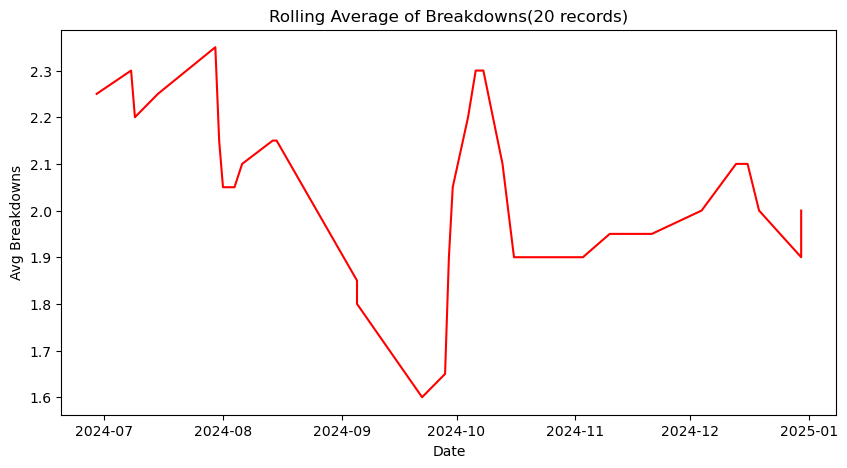

In [61]:
plt.figure(figsize=(10,5))
plt.plot(df_sorted["Last_Service_Date"],
         df_sorted["Rolling_Breakdowns"],color = "red")
plt.title("Rolling Average of Breakdowns(20 records)")
plt.xlabel("Date")
plt.ylabel("Avg Breakdowns")
plt.show()